In [3]:
import pandas as pd
df = pd.read_csv("./news_events_powerlaw.csv")
df["bucket"] = df["bucket"] + 1
print df.shape

(2508, 2)


In [11]:
import numpy as np
df['cdf'] = pd.Series(df['pdf'], index=df.index)
df['odr'] = pd.Series(df['pdf'], index=df.index)
df['ccdf'] = pd.Series(df['pdf'], index=df.index)

pdf = list(df['pdf'])
cdf = np.array(pdf)
odr = np.zeros(df.shape[0])
for i in range(1,df.shape[0],1):
    cdf[i] = cdf[i-1] + pdf[i]
for i in range(df.shape[0]):
    odr[i] = cdf[i] / (1.0 - cdf[i])
df['cdf'] = cdf
df['odr'] = odr
df['ccdf'] = 1.0 - df['cdf']
df.head()

,bucket,pdf,cdf,odr,ccdf
0,1,0.645918,0.645918,1.824202,0.354082
1,2,0.057519,0.703437,2.371964,0.296563
2,3,0.027696,0.731133,2.719305,0.268867
3,4,0.018174,0.749307,2.988936,0.250693
4,5,0.012875,0.762182,3.204888,0.237818


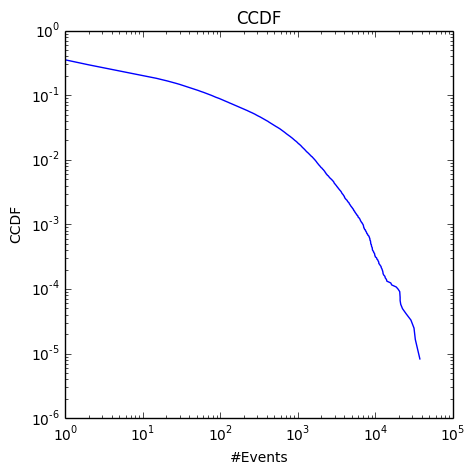

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

f, ax = plt.subplots(figsize=(5, 5))
ax.set(xscale="log", yscale="log")
line1, = ax.plot(df["bucket"], df["ccdf"])
ax.set_title('CCDF')
ax.set_xlabel('#Events')
ax.set_ylabel('CCDF')
plt.legend()
plt.savefig("CCDF.png")

{'polynomial': [1.053136273626643, -2.9923387230628347], 'determination': 0.8965633978490064}
[-2.99233872 -2.26236028 -1.83535027 ...,  7.92094535  7.96182776
  8.1044368 ]


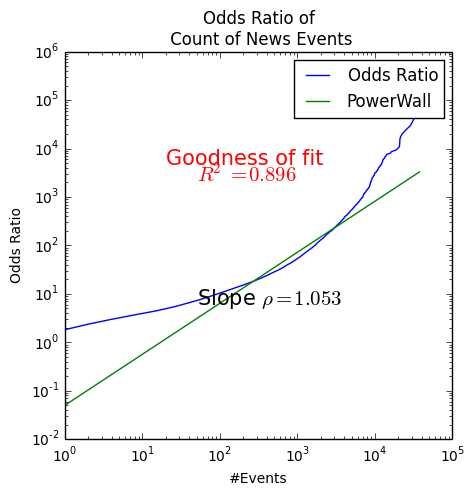

In [19]:
logODR = list(np.log(df["odr"][:-1]))
logbucket = list(np.log(df["bucket"][:-1]))

# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)

    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

results = polyfit(logbucket,logODR,1)
print results
expect_logODR = np.array(logbucket) * results["polynomial"][0] + results["polynomial"][1]
print expect_logODR


f, ax = plt.subplots(figsize=(5, 5))
ax.set(xscale="log", yscale="log")
line1, = ax.plot(df["bucket"], df['odr'], label="Odds Ratio")
line2, = ax.plot(df["bucket"][:-1], np.exp(expect_logODR), label="PowerWall")
ax.text(50, 6, r'Slope $\rho=1.053$', fontsize=15)
 
ax.text(20, 4500, r'Goodness of fit', color='red', fontsize=15)
ax.text(50, 2000, r'$R^2=0.896$', color='red', fontsize=15)

ax.set_title('Odds Ratio of \n Count of News Events')

ax.set_xlabel('#Events')
ax.set_ylabel('Odds Ratio')

plt.legend()
#plt.show()
plt.savefig("oddsratio.png")